# Final Project Report

* Class: DS 5100
* Student Name: Catherine Smith
* Student Net ID: cmj4ec
* This URL: a URL to the notebook source of this document

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Repo URL: https://github.com/smithykitty/Monte-Carlo-Python/tree/main

MODULE
NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

In [91]:
import numpy as np
import pandas as pd
import random

class die:
    #a die class with N sides/faces and W weights that can be rolled to select a face
    #Normally, dice and coins are “fair,” meaning that the each side has an equal weight. 
    #An unfair die is one where the weights are unequal.
    #Each side contains a unique symbol- Symbols may be all alphabetic or all numeric.
    #The die has one behavior, which is to be rolled one or more times.
    
    def __init__(self, faces):
        #initializer that takes an array of faces, then weights to 1, and saves into a private dataframe
        self.faces=np.array(faces)
        self._faces_weights=pd.DataFrame(data = faces, columns = ['Faces'], index = range(len(faces)))
        self._faces_weights['Weights'] = np.array([1 for i in range(len(faces))])
        
    
    def _check_unique(self, faces):
        #checks uniqueness of values and raises a ValueError if not
        seen = set()
        for item in seen:
            if item in seen:
                return False
                raise ValueError ("Value already seen!")
            seen.add(item)
        return True
    
    def change_weight(self, faces, new_weight):
        #weight can be changed after object is created
        if not (faces in list(self._faces_weights['Faces'])):
            return ValueError ("Face DNE in the list!")
        else:
            self._faces_weights.loc[self._faces_weights['Faces'] == faces, 'Weights'] = float(new_weight)
    def rolls(self, rolls=1):
        #The die has one behavior, which is to be rolled one or more times
        #Takes a parameter of how many times the die is to be rolled and defaults to 1
        rolled_results = self._faces_weights.sample(n = rolls, weights = 'Weights', replace = True)
        return list(rolled_results['Faces'])
    
    def show_me_die(self):
        #Returns a copy of the private die data frame
        return self._faces_weights
    
class game:
    #A game consists of rolling of one or more similar dice (Die objects) one or more times.
    #By similar dice, we mean that each die in a given game has the same number of sides and associated faces, but each die object may have its own weights.
    #Each game is initialized with a Python list that contains one or more dice.
    #Game objects have a behavior to play a game, i.e. to roll all of the dice a given number of times.
    #Game objects only keep the results of their most recent play.
    
    def __init__(self, die_choice):
        self.die_choice = die_choice
    
    def play(self, rolls):
        self._played = pd.DataFrame()
        self.rolls = rolls
        Random_Dice = 0
        for die in self.die_choice:
            dice_results = die.rolls(rolls=rolls)
            Random_Dice += 1
            series = pd.Series(dice_results, name = f'Die{Random_Dice}')
            self._played = pd.concat([self._played, series], axis = 1)
        self._played['Roll'] = self._played.index + 1
        self._played = self._played.set_index('Roll')
        
    def show_play(self, form = 'wide'):
        #A method to show the user the results of the most recent play.
        #This method just returns a copy of the private play data frame to the user.
        #Takes a parameter to return the data frame in narrow or wide form which defaults to wide form.
        #The narrow form will have a MultiIndex, comprising the roll number and the die number (in that order), and a single column with the outcomes (i.e. the face rolled).
        #This method should raise a ValueError if the user passes an invalid option for narrow or wide.
        self.form = form
        if not (form == 'wide' or form == 'narrow'):
            raise ValueError("INVALID: Input MUST be wide or narrow!") 
        elif form == 'wide':
            return self._played
        elif form == 'narrow':
            return self._played.stack().to_frame('Face')

class analyzer:
    #Takes the results of a single game and computes various descriptive statistical properties about it
    def __init__(self, game):
        self._game_ = game
        self.die_dtype = type(game.die_choice[0])
        self.JPs = 0
        self.counts_df = pd.DataFrame()

    def jackpots(self):
        #Jackpot method: a result in which all faces are the same, e.g. all ones for a six-sided die.
        #Computes how many times the game resulted in a jackpot.
        #Returns an integer for the number of jackpots.
        self.JPs_df = pd.DataFrame()
        for i in range(1, self._game_.show_play().T.shape[1]+1):
            if ((len(set(self._game_.show_play().loc[[i]].values[0].flatten())))==1):
                temp = self._game_.show_play().loc[[i]]
                self.JPs_df = pd.concat([self.JPs_df, temp], axis=0)
        self.JPs = self.JPs_df.shape[0]
        return self.JPs
    
    def face_count(self):    
        #facecount method to compute how many times a given face is rolled in each event
        #The data frame has an index of the roll number, face values as columns, and count values in the cells (wide format)
        self.face_count = self._game_.show_play().apply(lambda x: x.value_counts(), axis = 1).fillna(int(0))
        self.counts_df = self.face_count
        self.counts_df.index.name = 'Roll ID'
        self.counts_df.columns.name = "Die Face Shown"
        return self.counts_df
    
    def combo_count(self):
        #Computes the distinct combinations of faces rolled, along with their counts.
        #Combinations are order-independent and may contain repetitions.
        #Returns a data frame of results that should have a MultiIndex of distinct combinations and a column for the associated counts
        self.combo_df = pd.DataFrame()
        self.combo = self._game_._played.apply(lambda x: pd.Series(sorted(x)), 1).value_counts().to_frame('Count')
        self.combo_df = self.combo.sort_values(by='Count')
        self.combo_df.index.names = ["Face"+str(i) for i in range(1, len(self._game_.die_choice)+1)]
        return(self.combo_df)
    
    def permute_count(self):
        #Computes the distinct permutations of faces rolled, along with their counts.
        #Permutations are order-dependent and may contain repetitions.
        #Returns a data frame of results that should have a MultiIndex of distinct permutations and a column for the associated counts
        self.permute_df = pd.DataFrame()
        self.permute = self._game_._played.apply(lambda x: pd.Series(sorted(x)), 1).value_counts_distinct().to_frame('Count')
        self.permute_df = self.combo.sort_values(by='Count')
        self.permute_df.index.names = ["Face"+str(i) for i in range(1, len(self._game_.die_choice)+1)]
        return(self.permute_df) 

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

In [93]:
import unittest
#from montecarlosim import die, game, analyzer
import pandas as pd
import numpy as np
import pandas.testing as pdt

#Test via Unittest package containing at least one method for each method in each of the three classes 
#Each test method should verify that the target method creates an appropriate data structure
class montecarlosimTestSuite(unittest.TestCase):
    #Test Suite for Monte Carlo Simulator
    
    def test_die(self):
        #create a 6-sided die with valid sides/weight
        die = die([1,2,3,4,5,6])
        x = 1
        if x not in die.faces_weights['Weights'].values:
            raise AssertionError('Invalid Weight!')
    
    def test_check_unique(self):
        #checks uniqueness of values and raises a ValueError if not unique
        die = [1,2,3,4,5,6]
        self.assertTrue(test_check_unique(die), "FAIL: List must have unique values!")
        
        
    def test_check_unique_dupe(self):
        #test with duplicate values
        die = [1,2,2,3,4,5]
        self.assertFalse(test_check_unique_dupe(die), "FAIL: List with duplicate values!") 
        
    def test_weight_change(self):
        #change the weight of a side
        die = die([1,2,3,4,5,6])
        die.change_weight(2,3)
        expected = 3
        actual = die.show_die().loc[die.show_die()['Faces'] == 2, 'Weights'].values[0]
        self.assertEqual(expected, actual)
    
    def test_rolls(self):
        #The die has one behavior, which is to be rolled one or more times
        #Takes a parameter of how many times the die is to be rolled and defaults to 1
        die = [1,2,3,4,5,6]
        test_rolls = die(die)
        roll = test_rolls.rolls(4)
        self.assertEqual(len(roll), 4)
    
    def test_show_me_die(self):
        #Returns a copy of the private die data frame
        die = [1,2,3,4,5,6]
        test_show_me_die = Die(die)
        test_show_me_die_df = test_show_me_die_df.show_die()
        test_show_me_die_type = type(test_show_me_die_df)
        x = pd.DataFrame()
        pd_type = type(x)
        self.assertEqual(test_show_me_die_type, pd_type)

import unittest
#from montecarlosim import Die, Game, Analyzer
import pandas as pd
import numpy as np
import pandas.testing as pdt

#Test via Unittest package containing at least one method for each method in each of the three classes 
#Each test method should verify that the target method creates an appropriate data structure
class montecarlosimTestSuite(unittest.TestCase):
    #Test Suite for Monte Carlo Simulator
    
    def test_die(self):
        #create a 6-sided die with valid sides/weight
        die = die([1,2,3,4,5,6])
        x = 1
        if x not in die.faces_weights['Weights'].values:
            raise AssertionError('Invalid Weight!')
    
    def test_check_unique(self):
        #checks uniqueness of values and raises a ValueError if not unique
        die = [1,2,3,4,5,6]
        self.assertTrue(test_check_unique(die), "FAIL: List must have unique values!")
        
        
    def test_check_unique_dupe(self):
        #test with duplicate values
        die = [1,2,2,3,4,5]
        self.assertFalse(test_check_unique_dupe(die), "FAIL: List with duplicate values!") 
        
    def test_weight_change(self):
        #change the weight of a side
        die = die([1,2,3,4,5,6])
        die.change_weight(2,3)
        expected = 3
        actual = die.show_die().loc[die.show_die()['Faces'] == 2, 'Weights'].values[0]
        self.assertEqual(expected, actual)
    
    def test_rolls(self):
        #The die has one behavior, which is to be rolled one or more times
        #Takes a parameter of how many times the die is to be rolled and defaults to 1
        die = [1,2,3,4,5,6]
        test_rolls = die(die)
        roll = test_rolls.rolls(4)
        self.assertEqual(len(roll), 4)
    
    def test_show_me_die(self):
        #Returns a copy of the private die data frame
        die = [1,2,3,4,5,6]
        test_show_me_die = Die(die)
        test_show_me_die_df = test_show_me_die_df.show_die()
        test_show_me_die_type = type(test_show_me_die_df)
        x = pd.DataFrame()
        pd_type = type(x)
        self.assertEqual(test_show_me_die_type, pd_type)      

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [29]:
from montecarlo.montecarlosim_classes import die, game, analyzer
from matplotlib import pyplot as plt

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [23]:
help("montecarlo.montecarlosim_classes")

Help on module montecarlo.montecarlosim_classes in montecarlo:

NAME
    montecarlo.montecarlosim_classes

CLASSES
    builtins.object
        analyzer
        die
        game
    
    class analyzer(builtins.object)
     |  analyzer(game)
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  combo_count(self)
     |  
     |  face_count(self)
     |  
     |  jackpots(self)
     |  
     |  permute_count(self)
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptors defined here:
     |  
     |  __dict__
     |      dictionary for instance variables (if defined)
     |  
     |  __weakref__
     |      list of weak references to the object (if defined)
    
    class die(builtins.object)
     |  die(faces)
     |  
     |  Methods defined here:
     |  
     |  __init__(self, faces)
     |      Initialize self.  Se

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL:https://github.com/smithykitty/Monte-Carlo-Python/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

In [45]:
!pip install -e . 

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///sfs/gpfs/tardis/home/cmj4ec/DS5100-cmj4ec/Final_Project
  Preparing metadata (setup.py) ... done
  Attempting uninstall: Montecarlo-Simulator
    Found existing installation: Montecarlo-Simulator 1.0
    Uninstalling Montecarlo-Simulator-1.0:
      Successfully uninstalled Montecarlo-Simulator-1.0
  Running setup.py develop for Montecarlo-Simulator


# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [54]:
faircoin = die(np.array(["H", "T"]))
unfaircoin = die(np.array(["H", "T"]))
unfaircoin.change_weight("H", 5)

Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [134]:
fair_game = game([faircoin, faircoin, faircoin])
fair_game.play(1000)

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [99]:
unfair_game = game([unfaircoin, unfaircoin, faircoin])
unfair_game.play(1000)

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [106]:
fair_JPs = analyzer(fair_game)
unfair_JPs = analyzer(unfair_game)

In [ ]:
rel_freq_fair = fair_JPs.jackpot()
rel_freq_unfair = unfair_JPs.jackpot()

Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [112]:
rel_fair_freq = 21/1000
rel_unfair_freq = 113/1000

Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

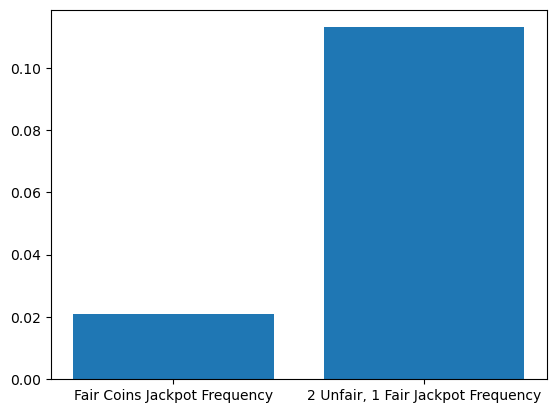

In [113]:
plt.figure()
plt.bar(['Fair Coins Jackpot Frequency', '2 Unfair, 1 Fair Jackpot Frequency'],
        [rel_fair_freq, rel_unfair_freq])
plt.show()

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [115]:
fair_die = die([1,2,3,4,5,6])
unfair_1 = die([1,2,3,4,5,6])
unfair_2 = die([1,2,3,4,5,6])

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [117]:
unfair_1.change_weight(6, 5)

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [118]:
unfair_2.change_weight(1, 5)

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [136]:
fair_game_die = Game([fair_die, fair_die, fair_die, fair_die, fair_die])
fair_game_die.play(10000)
fair_game_die.show_play().head()

,Die1,Die2,Die3,Die4,Die5
Roll,,,,,
1,2,1,6,1,2
2,2,2,2,5,4
3,5,5,5,5,4
4,5,2,4,6,2
5,5,4,5,5,1


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [135]:
unfair_game_die = Game([unfair_1, unfair_1, unfair_2, fair_die, fair_die])
unfair_game_die.play(10000)
unfair_game_die.show_play().head()

,Die1,Die2,Die3,Die4,Die5
Roll,,,,,
1,1,6,4,3,4
2,6,3,3,4,6
3,6,3,1,4,2
4,4,1,1,2,2
5,4,3,1,3,3


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

In [122]:
fair_die_JPs = analyzer(fair_game_die)
unfair_die_JPs = analyzer(unfair_game_die)

In [ ]:
rel_freq_fair_die = fair_die_JPs.jackpot()
rel_freq_unfair_die = unfair_die_JPs.jackpot()

In [124]:
rel_fair_freq = 231/10000
rel_unfair_freq = 1471/10000

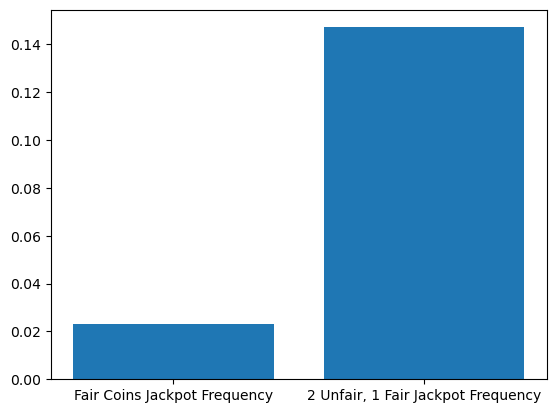

In [125]:
plt.figure()
plt.bar(['Fair Coins Jackpot Frequency', '2 Unfair, 1 Fair Jackpot Frequency'],
        [rel_fair_freq, rel_unfair_freq])
plt.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [127]:
engletters = pd.read_csv("english_letters.txt", sep=' ', header = None)
letterdie = die(np.array(list(engletters[0])))
for letter in engletters.index:
    letterdie.change_weight(engletters[0][letter], engletters[1][letter])


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [131]:
gamescen3 = game([letterdie, letterdie, letterdie, letterdie])
gamescen3.play(1000)
gamescen3.show_play().head()

,Die1,Die2,Die3,Die4
Roll,,,,
1,S,T,A,I
2,N,T,H,E
3,C,R,R,B
4,I,S,T,O
5,W,E,A,N


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [141]:
scrabblewords = pd.read_csv("scrabble_words.txt", header = None)

In [143]:
gamescen3analyze = analyzer(gamescen3)

In [ ]:
gook= (gamescen3analyze.permute_count()[0] + gamescen3analyze.permute_count()[1] + gamescen3analyze.permute_count()[2] + gamescen3analyze.permute_count()[3]).to_frame()
isinscrabble = gook[0].isin(scrabblewords[0])
totalwordcount = sum(isinscrabble[isinscrabble == True])
totalwordcount

In [139]:
#6 words

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [151]:
gamescen34 = game([letterdie, letterdie, letterdie, letterdie, letterdie])
gamescen34.play(1000)
gamescen34.show_play().head()

,Die1,Die2,Die3,Die4,Die5
Roll,,,,,
1,R,D,N,S,O
2,I,M,I,O,R
3,O,G,F,D,L
4,S,U,N,I,I
5,L,A,V,O,R


In [152]:
gamescen34analyze = analyzer(gamescen34)

In [ ]:
gooks= (gamescen34analyze.permute_count()[0] + gamescen34analyze.permute_count()[1] + gamescen34analyze.permute_count()[2] + gamescen34analyze.permute_count()[3]).to_frame()
isinscrabble34 = gooks[0].isin(scrabblewords[0])
totalwordcount34 = sum(isinscrabble34[isinscrabble34 == True])
totalwordcount34
#More in the 4 dice somehow?! 